# Project 2: Binary Classification on ‘Customer_Churn’using Keras

# Problem Statement:

You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.

# Domain Context –

Customer churn, in simple terms means that the customer has stopped doing business with the company
and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive
analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.


# Customer_churn Dataset:

The details regarding this ‘customer_churn’ dataset are present in the data dictionary:

# Load the Libaries and Dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Read the datasets
data=pd.read_csv('customer_churn.csv')

#Top 5 records of datasets
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Last 5 records of dataset
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# EDA - Exploratry Data Analysis

In [6]:
# Check the basic information of out data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset has total 7042 records with 21 columns and Total Charges has OBJECT as datatype, we need to change this to int as this columns must be in float.

In [7]:
# Convert the Total Charges into Float from Object.
data['TotalCharges']=pd.to_numeric(data.TotalCharges,errors='coerce')

#Check the basic information again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Check the null value and missing data..
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Handing missing values in dataset.
data.dropna(inplace=True)

In [10]:
#check the missing value again
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Check the duplicate records.
data.duplicated().sum()

0

In [12]:
# 5 number summary/ statstic veiw of our numerical columns.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# 5 number summary/ statstic veiw of our categorial columns
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


# Tasks to be done:

# A) Data Manipulation:



a. Find the total number of male customers



In [14]:
data['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

b. Find the total number of customers whose Internet Service is ‘DSL’



In [15]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’


In [16]:
new_customer=data[(data['SeniorCitizen']==1)&(data['gender']=='Female')&(data['PaymentMethod']=='Mailed check')]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417.00,No
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.90,No
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’


In [17]:
new_cusotmer=data[(data['tenure']<=10) & (data['TotalCharges']<=500)]
new_cusotmer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


# B) Data Visualization

a. Build a pie-chart to show the distribution of customers would be churning out


In [18]:
churn_cust=data['Churn'].value_counts()
churn_cust

No     5163
Yes    1869
Name: Churn, dtype: int64

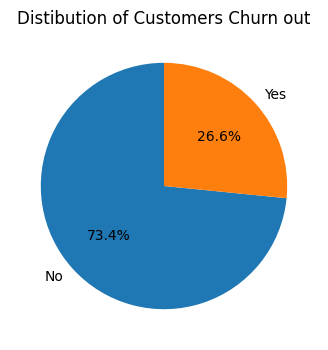

In [19]:
# Pie Chart
plt.figure(figsize=(4,4))
plt.pie(churn_cust,labels=churn_cust.index,autopct='%1.1f%%',startangle=90)
plt.title('Distibution of Customers Churn out')
plt.show()

b. Build a bar-plot to show the distribution of ‘Internet Service’

In [20]:
int_service=data['InternetService'].value_counts()
int_service

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

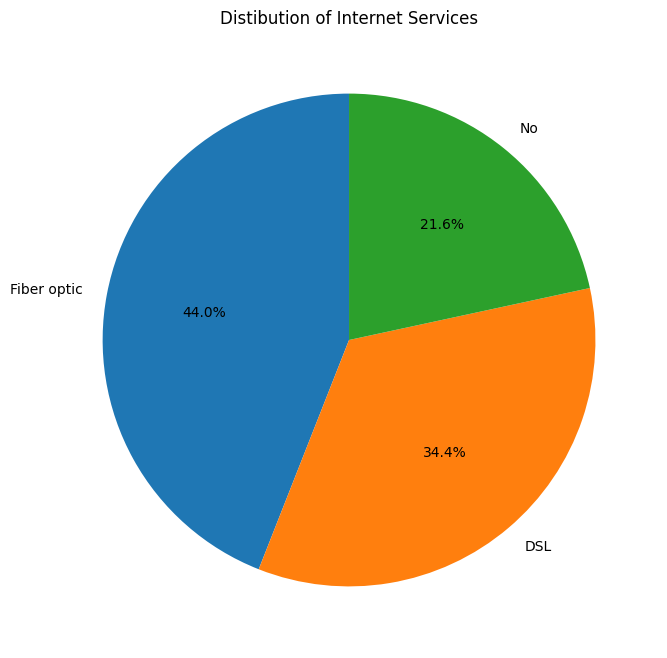

In [21]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(int_service,labels=int_service.index,autopct='%1.1f%%',startangle=90)
plt.title('Distibution of Internet Services')
plt.show()


# C) Model Building:

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

In [65]:
# Coverting the Churn values into numerical for modeling.
data['Churn'].replace(to_replace="Yes",value=1,inplace=True)
data['Churn'].replace(to_replace="No",value=0,inplace=True)


In [67]:
# Divide the data into Features & Targets for Modeling.
X=data['tenure']  #Features
y=data['Churn']   #Targets

In [69]:
# Train, Test, Split of Data for model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274,)
(1758,)
(5274,)
(1758,)


In [70]:
# reshape of X train & X test
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [71]:
# Normalized the featrues
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.astype(float))
X_test=scaler.transform(X_test.astype(float))

In [73]:
model=tf.keras.models.Sequential()
#i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
model.add(tf.keras.layers.InputLayer(input_shape=(1,),name='Input'))
model.add(tf.keras.layers.Dense(12,activation='relu',name='Dense1'))

# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
model.add(tf.keras.layers.Dense(8,activation='relu',name='Dense2'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='Output'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 12)                24        
                                                                 
 Dense2 (Dense)              (None, 8)                 104       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# iii. Use ‘Adam’ as the optimization algorithm
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
# iv. Fit the model on the train set, with number of epochs to be 150.
history=model.fit(X_train,y_train,epochs=150,verbose=0)

In [87]:
# v. Predict the values on the test set and build a confusion matrix
y_pred=model.predict(X_test)
y_pred_binary=(y_pred>0.5).astype(int)

55/55 [==============================] - 0s 2ms/step


In [88]:
con_matrix=confusion_matrix(y_test,y_pred_binary)
con_matrix

array([[1180,  120],
       [ 309,  149]])

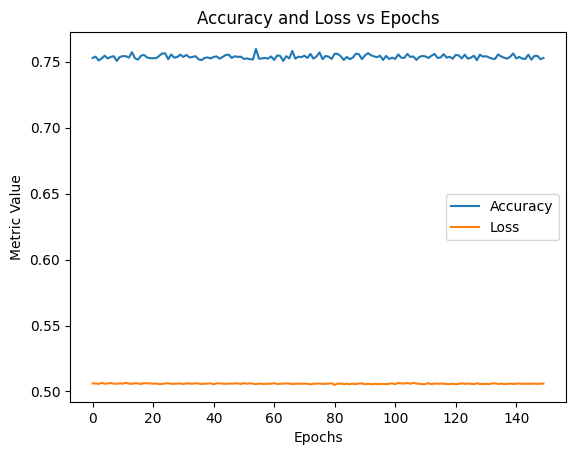

In [91]:
# vi. Plot the ‘Accuracy vs Epochs’ graph
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Accuracy and Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


b. Build the 2nd model using same target and feature variables:

i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii. Predict the values on the test set and build a confusion matrix

iv. Plot the ‘Accuracy vs Epochs’ graph


In [94]:
model1=tf.keras.models.Sequential()
#i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
model1.add(tf.keras.layers.InputLayer(input_shape=(1,),name='Input'))
# i. Add a drop-out layer after the input layer with drop-out value of 0.3
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(12,activation='relu',name='Dense1'))
# ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
model1.add(tf.keras.layers.Dropout(0.2))
# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
model1.add(tf.keras.layers.Dense(8,activation='relu',name='Dense2'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid',name='Output'))
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 Dense1 (Dense)              (None, 12)                24        
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 Dense2 (Dense)              (None, 8)                 104       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model1.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [126]:
history1=model1.fit(X_train,y_train,epochs=150)

Epoch 1/150
165/165 [==============================] - 1s 5ms/step - loss: 0.5311 - accuracy: 0.7421
Epoch 2/150
165/165 [==============================] - 1s 4ms/step - loss: 0.5299 - accuracy: 0.7476
Epoch 3/150
165/165 [==============================] - 1s 3ms/step - loss: 0.5322 - accuracy: 0.7446
Epoch 4/150
165/165 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7488
Epoch 5/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7510
Epoch 6/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7442
Epoch 7/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7467
Epoch 8/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7423
Epoch 9/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7476
Epoch 10/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5276 - accura

In [127]:
# iii. Predict the values on the test set and build a confusion matrix
y_pred1=model1.predict(X_test)
y_pred_binary=(y_pred>0.5).astype(int)

55/55 [==============================] - 0s 1ms/step


In [128]:
Confu_metrix=confusion_matrix(y_pred_binary,y_test)
Confu_metrix

array([[1180,  309],
       [ 120,  149]])

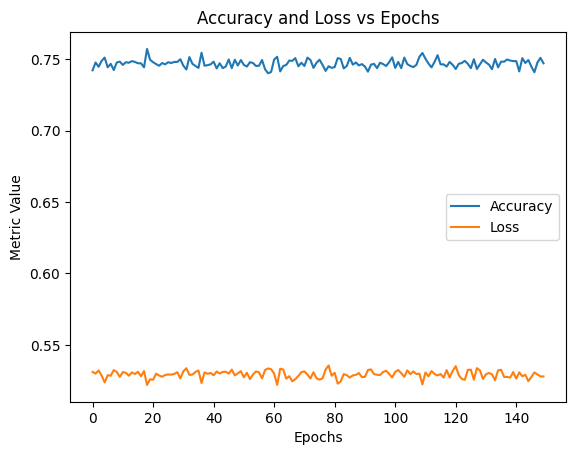

In [129]:
# iv. Plot the ‘Accuracy vs Epochs’ graph
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['loss'], label='Loss')
plt.title('Accuracy and Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:

In [132]:

X=data[['tenure','MonthlyCharges','TotalCharges']].values
y=data['Churn']

In [152]:
# Train Test Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# reshape of Train data
X_train=X_train.reshape(-1,3)
X_test=X_test.reshape(-1,3)

# Normalization of X train & Xtest set
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [154]:
model3=tf.keras.models.Sequential()
#i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
model3.add(tf.keras.layers.InputLayer(input_shape=(3),name='Input'))
model3.add(tf.keras.layers.Dense(12,activation=tf.keras.activations.relu,name='Hidden1'))
#ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
model3.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu,name='Hidden2'))
model3.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid,name='output'))
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 12)                48        
                                                                 
 Hidden2 (Dense)             (None, 8)                 104       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [155]:
# iii. Use ‘Adam’ as the optimization algorithm
model3.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [156]:
# iv. Fit the model on the train set, with number of epochs to be 15
hisotry3=model3.fit(X_train,y_train,epochs=150)

Epoch 1/150
176/176 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7458
Epoch 2/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7753
Epoch 3/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7717
Epoch 4/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7737
Epoch 5/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7758
Epoch 6/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7778
Epoch 7/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7799
Epoch 8/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7790
Epoch 9/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7781
Epoch 10/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4566 - accura

In [157]:
#v. Predict the values on the test set and build a confusion matrix

y_pred3=model3.predict(X_test)
y_pred3_binary=(y_pred3>0.5).astype(int)

44/44 [==============================] - 1s 8ms/step


In [158]:
confusion_matrix(y_pred3_binary,y_test)

array([[951, 183],
       [ 95, 178]])

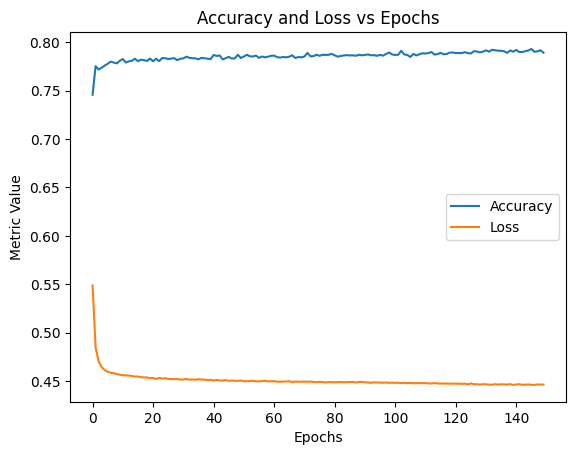

In [161]:
# vi. Plot the ‘Accuracy vs Epochs’ graph
plt.plot(hisotry3.history['accuracy'], label='Accuracy')
plt.plot(hisotry3.history['loss'], label='Loss')
plt.title('Accuracy and Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.show()
